In [267]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [268]:
data_set = datasets.load_breast_cancer()
X=data_set.data
y=data_set.target
print(data_set.target_names)
data_set.keys()

['malignant' 'benign']


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [269]:
# create a dataframe for the data_set
df = pd.DataFrame()
print(data_set['data'].shape)
df['data'] = data_set['data'].tolist()
df['target'] = data_set['target']
df.head()

(569, 30)


,data,target
0,"[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, ...",0
1,"[20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864...",0
2,"[19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, ...",0
3,"[11.42, 20.38, 77.58, 386.1, 0.1425, 0.2839, 0...",0
4,"[20.29, 14.34, 135.1, 1297.0, 0.1003, 0.1328, ...",0


In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
# sc.fit(X_train)
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('Number of total data is:, ', len(X))
print('Number of train data is:, ', len(X_train_std))
print('Number of test data is:, ', len(X_test_std))

Number of total data is:,  569
Number of train data is:,  426
Number of test data is:,  143


In [271]:
clf = LogisticRegression().fit(X_train_std, y_train)
y_pred_train=clf.predict(X_train_std)
print((y_train==y_pred_train).sum())
accuracy=((y_train==y_pred_train).sum()/len(X_train_std))
print(accuracy)
clf.score(X_train_std, y_train)

422
0.9906103286384976


0.9906103286384976

In [272]:
y_pred_test=clf.predict(X_test_std)
print((y_test==y_pred_test).sum())
accuracy_test=((y_test==y_pred_test).sum()/len(X_test_std))
print(accuracy_test)
clf.score(X_test_std, y_test)

138
0.965034965034965


0.965034965034965

In [273]:
y_pred_test_prob = clf.predict_proba(X_test_std)
y_pred_test_prob[:5]

array([[9.98628887e-01, 1.37111295e-03],
       [3.83536656e-02, 9.61646334e-01],
       [1.27259797e-03, 9.98727402e-01],
       [1.24727859e-02, 9.87527214e-01],
       [2.18215888e-04, 9.99781784e-01]])

In [274]:
prediction = pd.DataFrame()
prediction['test_data'] = X_test_std.tolist()
prediction['actual'] = data_set.target_names[y_test]
prediction['predicted'] = data_set.target_names[y_pred_test]
prediction['correct'] = prediction['actual'] == prediction['predicted']
prediction['prob'] = y_pred_test_prob.tolist()
prediction['prob'] = prediction['prob'].apply(lambda x: max(x))
prediction.head()


,test_data,actual,predicted,correct,prob
0,"[-0.20656117887535716, 0.2863110515326301, -0....",malignant,malignant,True,0.998629
1,"[-0.260523876144554, 1.3870138023481093, -0.32...",benign,benign,True,0.961646
2,"[-0.030472377260082912, -0.8446435719268262, -...",benign,benign,True,0.998727
3,"[0.03769102981679758, -0.2605497231854193, -0....",benign,benign,True,0.987527
4,"[-0.31164643145221477, -0.20237304502392464, -...",benign,benign,True,0.999782


In [275]:
# df_result = pd.DataFrame(index=['train_malignant', 'train_benign', 'test_malignant', 'test_benign'])
df_result = pd.DataFrame()
df_result['data_type'] = np.array(['train_malignant', 'train_benign', 'test_malignant', 'test_benign'])
df_result['actual_num'] = np.array([(y_train==0).sum(), (y_train==1).sum(), (y_test==0).sum(), (y_test==1).sum()])
df_result['predicted_num'] = np.array([(y_pred_train==0).sum(), (y_pred_train==1).sum(), (y_pred_test==0).sum(), (y_pred_test==1).sum()])
df_result

,data_type,actual_num,predicted_num
0,train_malignant,159,155
1,train_benign,267,271
2,test_malignant,53,52
3,test_benign,90,91


Text(0, 0.5, 'Number')

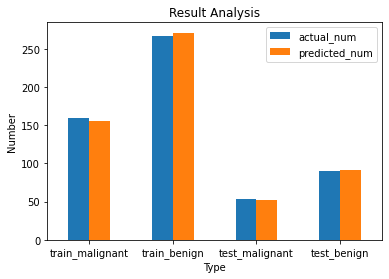

In [276]:
df_result.plot.bar(rot=0)
plt.xticks(range(4), labels=df_result['data_type'])
plt.title('Result Analysis')
plt.xlabel('Type')
plt.ylabel('Number')